<a href="https://colab.research.google.com/github/IanChoi2464/Machine-Learning-Colab/blob/main/9_2_%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9C%BC%EB%A1%9C_IMDB_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

텐서플로를 사용해 순환 신경망을 만들어 영화 리뷰 데이터셋에 적용해서 리뷰를 긍정과 부정으로 분류한다.
# Keyword
**말뭉치**: corpus, 자연어 처리에서 사용하는 텍스트 데이터의 모음, 즉 훈련 데이터셋을 뜻함\
**토큰**: token, 텍스트에서 공백으로 구분되는 문자열을 말함, 종종 소문자로 변환하고 구둣점은 삭제함\
**one-hot encoding**: 어떤 클래스에 해당하는 원소만 1이고 나머지는 모두 0인 벡터, 정수로 변환된 토큰을 one-hot encoding으로 변환하려면 어휘 사전 크기의 벡터가 만들어짐\
**단어 임베딩**: 정수로 변환된 토큰을 비교적 작은 크기의 실수 밀집 벡터로 변환, 이런 밀집 벡터는 단어 사이의 관계를 표현할 수 있기 때문에 자연어 처리에서 좋은 성능을 발휘함
# Function
### **Tensorflow**
**pad_sequences()**: 시퀀스 길이를 맞추기 위해 패딩을 추가, 이 함수는 (샘플 개수, 타임스텝 개수) 크기의 2차원 배열을 기대함\
maxlen 매개변수로 원하는 시퀀스 길이를 지정할 수 있음, 이 값보다 긴 시퀀스는 잘리고 짧은 시퀀스는 패딩 됨, 이 매개변수를 지정하지 않으면 가장 긴 시퀀스의 길이가 됨\
padding 매개변수는 패딩을 추가할 위치를 지정, 기본값인 'pre'는 시퀀스 앞에 패딩을 추가하고 'post'는 시퀀스 뒤에 패딩을 추가함\
truncating 매개변수는 긴 시퀀에서 잘라버릴 위치를 지정함, 기본값인 'pre'는 시퀀스 앞부분을 잘라내고 'post'는 시퀀스 뒷부분을 잘라냄\
**to_categorical()**: 정수 시퀀스를 원-핫 인코딩으로 변환, 토큰을 원-핫 인코딩하거나 타깃값을 원-핫 인코딩할 때 사용\
num_classes 매개변수에서 클래스 개수를 지정할 수 있음, 지정하지 않으면 데이터에서 자동으로 찾음\
**SimpleRNN**: 케라스의 기본 순환층 클래스\
첫 번째 매개변수에 뉴런의 개수 지정\
activation 매개변수에서 활성화 함수를 지정, 기본값은 하이퍼볼린 탄젠트인 'tanh'\
dropout 매개변수에서 입력에 대한 드롭아웃 비율을 지정할 수 있음\
return_sequences 매개변수에서 모든 타임스텝의 은닉 상태를 출력할지 결정, 기본값은 False\
**Embedding**: 단어 임베딩을 위한 클래스\
첫 번째 매개변수에서 어휘 사전의 크기를 지정,
두 번째 매개변수에서 Embedding 층이 출력할 밀집 벡터의 크기를 지정\
input_length 매개변수에서 입력 시퀀스의 길이를 지정, 이 매개변수는 Embedding층 바로 뒤에 Flatten이나 Dense 클래스가 올 때 꼭 필요
# Tip
1. 합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지의 시각적인 정보를 감지하고 뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습한다고 볼 수 있다.
2. model._layers[0]은 Sequential 클래스의 InputLayer 객체

In [ ]:
"""IMDB 리뷰 데이터 준비"""
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
print(train_input.shape, test_input.shape)
print(len(train_input[0]))
print(len(train_input[1]))
print(train_input[0])
print(train_target[:20])

from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

(25000,) (25000,)
218
189
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


239.00925 178.0


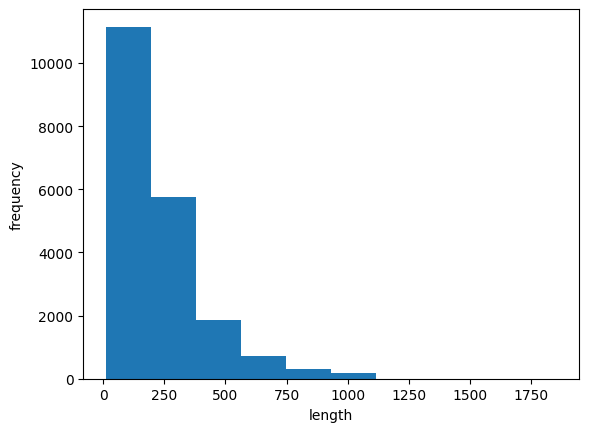

In [ ]:
"""IMDB 리뷰 데이터 알아보기"""
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [ ]:
"""padding"""
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
print(train_seq.shape)
print(train_seq[0])
print(train_input[0][-10:])
print(train_seq[5])
val_seq = pad_sequences(val_input, maxlen=100)

(20000, 100)
[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]
[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]
[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [ ]:
"""순환 신경망 만들기"""
from tensorflow import keras
model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)
print(train_oh[0][0][:12])
print(np.sum(train_oh[0][0]))

val_oh = keras.utils.to_categorical(val_seq)
model.summary()

(20000, 100, 500)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4081 (15.94 KB)
Trainable params: 4081 (15.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
"""순환 신경망 훈련하기"""
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
"""순환 신경망 알아보기"""
plt.plot(history.history[loss])
plt.plot(history.history[val_loss])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
"""단어 임베딩 사용하기"""
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8209 (32.07 KB)
Trainable params: 8209 (32.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
"""단어 임베딩 사용해서 훈련하기"""
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history[loss])
plt.plot(history.history[val_loss])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()